# K-Nearest Neighbors

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Prepare Dataset 

This is a classified Dataset and the meaning of the data and columns are ambiguous. 

In [2]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)
display(raw_data)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


### Scale Data

The scale of the features within a Dataset matters since you need to use the observations closest 
to the data point in order to make predictions.</br> 

For this reason, Machine Learning Practitioners standardize the Dataset a lot of the time by adjusting every x-value so they're approximately on the same scale.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler().fit(raw_data.drop('TARGET CLASS', axis = 1))

In [6]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis = 1))

Standardize all of the features in the Dataset to be approximately the same scale.

In [7]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis = 1).columns)

### Split Training and Test Data

Lets do the *70*/*30* split for training and testing.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Specify x-values as the scaled_data DataFrame we created.
x = scaled_data
# Specify y-values as the TARGET CLASS column of raw_data DataFrame.
y = raw_data['TARGET CLASS']

In [10]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

## K-Nearest Neighbors Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model_k_1 = KNeighborsClassifier(n_neighbors = 1).fit(x_training_data, y_training_data)

### Make Predictions and Measure Performance

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
predictions_k_1 = model_k_1.predict(x_test_data)

In [15]:
performance_report = classification_report(y_test_data, predictions_k_1)
print(performance_report)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       142
           1       0.88      0.96      0.92       158

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [16]:
performance_matrix = confusion_matrix(y_test_data, predictions_k_1)
print(performance_matrix)

[[122  20]
 [  7 151]]


## Optimal K-Value

Let's use the elbow method to find the optimal *K*-value.

Loop through *K* values from *1* to *100* and select the value with the lowest error rate when applied to our Test Data. This is done by appending the error rates for the *K* values to a list `error_rates`.

In [17]:
error_rates = []
for i in np.arange (1, 101) :    
    # We must create a new instance of class KNeighborsClassifier from scikit-learn.
    new_model = KNeighborsClassifier(n_neighbors = i)
    # Train the model by fitting it to our Training Data.
    new_model.fit(x_training_data, y_training_data)
    # Make predictions on the Test Data.
    new_predictions = new_model.predict(x_test_data)
    # Calculate the mean difference for every incorrect prediction. 
    error_rates.append(np.mean(new_predictions != y_test_data))

### K-Value Error Rate Plot

Visualize how our error rate changes with different *K* values using a `matplotlib` visualization.

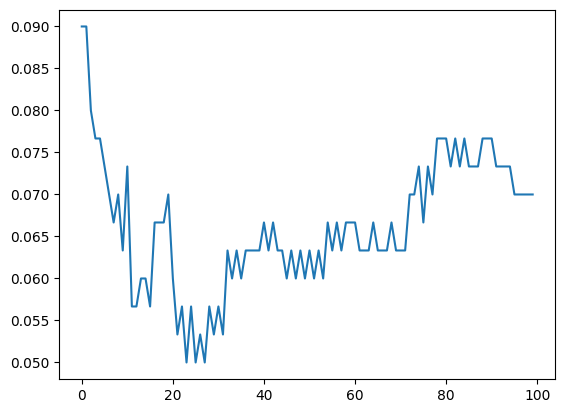

In [18]:
plt.plot(error_rates)

## Model With K = 50

We notice that the error rates tend to be minimized with *K* value of approximately *50*. This would balance both simplicity and predictive power to refrain from delving into overfitting and underfitting our model.

In [19]:
model_k_50 = KNeighborsClassifier(n_neighbors = 50).fit(x_training_data, y_training_data)

### Make Predictions and Measure Performance 

In [20]:
predictions_k_50 = model_k_50.predict(x_test_data)

In [21]:
report_k_50 = classification_report(y_test_data, predictions_k_50)
print(report_k_50)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       142
           1       0.92      0.97      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [22]:
matrix_k_50 = confusion_matrix(y_test_data, predictions_k_50)
print(matrix_k_50)

[[128  14]
 [  4 154]]
